# Data Exploration

In [16]:
%config Completer.use_jedi = False
%matplotlib inline

import warnings
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas-profiling is outdated, using ydata_profiling
import ydata_profiling

# ignore warnings from ydata_profiling
warnings.filterwarnings('ignore')

## Generate a run in W&B

In [3]:
# create the run
run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)

# download the file
local_path = wandb.use_artifact("sample.csv:latest").file()

# load dataset
df = pd.read_csv(local_path)

## Create the profiling for data explorartion

In [4]:
# generate profile
profile = ydata_profiling.ProfileReport(df)

# load profile into widget
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Check outliers

We will only check outliers for the price and plot

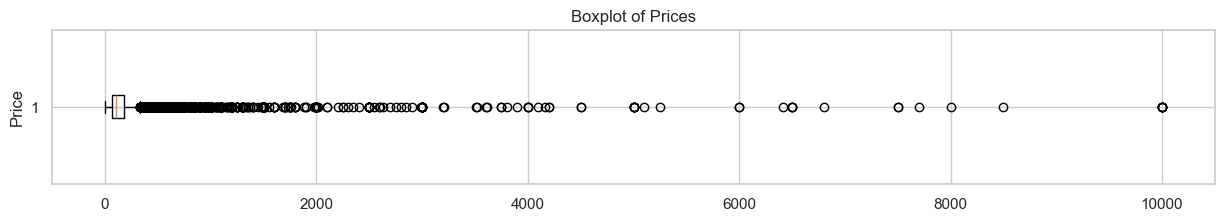

In [29]:
# Set the style of seaborn
sns.set(style="whitegrid")

# set fig size 
plt.figure(figsize=(15, 2))

# Create a boxplot
plt.boxplot(df['price'], vert=False)  

# Adding titles and labels
plt.title('Boxplot of Prices')
plt.ylabel('Price')

# Show the plot
plt.show()

## Drop outliers and replot

In [30]:
# define boundaries
min_price = 10
max_price = 350

# slice out outliers
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()

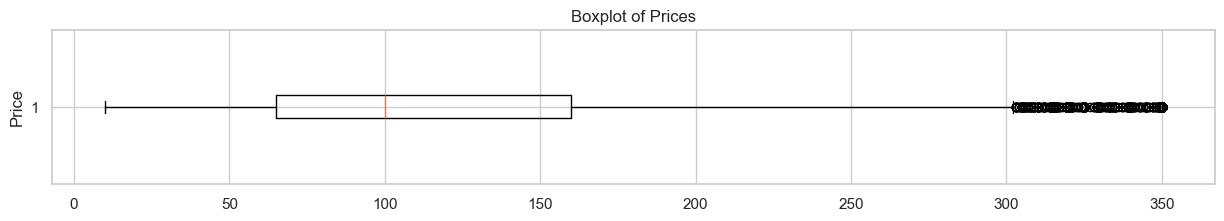

In [31]:
# Set the style of seaborn
sns.set(style="whitegrid")

# set fig size 
plt.figure(figsize=(15, 2))

# Create a boxplot
plt.boxplot(df['price'], vert=False)  

# Adding titles and labels
plt.title('Boxplot of Prices')
plt.ylabel('Price')

# Show the plot
plt.show()

In [ ]:

# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [9]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaT,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            18994 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       18993 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  number_

In [ ]:
run.finish()